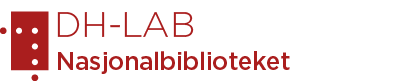

# NER og POS med Spacy

Hent ut navn og steder fra en tekst i Nasjonalbibliotekets samling med `NER`.

Finn ordklasser med `POS`.

In [10]:
import dhlab as dh
from dhlab import Corpus
from dhlab.text.parse import NER, POS, Models

Hent ut en urn

In [44]:
# Bygg et korpus basert Agnar Mykle og hent ut urn-kolonnen som liste
urns = Corpus(doctype="digibok", author="mykle", title="røde").frame.urn
# Hent ut en urn
my_urn = urns[1]

Oversikt over modeller:  
Dhlab støtter Per januar 2023 språkene norsk, dansk og engelsk. Tilgjengelige modeller finnes ved å bruke `Models`. Man kan lese mer om de enkelte modellene på [Spacys hjemmesider](https://spacy.io/).  

`nb_core_news_sm` er et bra utgangspunkt for en norskspråklig bok eller avis.

In [43]:
l = Models()
l.models

['nb_core_news_lg',
 'da_core_news_lg',
 'nb_core_news_sm',
 'en_core_web_lg',
 'en_core_web_md',
 'da_core_news_trf']

## NER

NER (Named Entity Recognition) brukes for å finne navngitte entiteter, som personer, steder, osv. i teksten.

In [45]:
result = NER(urn=my_urn, model="nb_core_news_sm", start_page=0, to_page=1000000)

In [47]:
result.ner

,token,ner,frekv
39,Ask,PER,812
140,Daniel,PER,115
281,Gud,PER,83
1360,mann,PER,83
1560,s,ORG,78
...,...,...,...
779,Uganda,LOC,1
776,Tyskeren,MISC,1
775,Tysk,MISC,1
774,Tusen,PER,1


## POS – Ordklassetagging

Finn ordklasser og dependens for en tekst med `POS`

In [39]:
res = POS(urn=urns[1], model=l.models[2], to_page=10000)

In [40]:
res.pos

,token,lemma,pos,dep,frekv
78,",",",",PUNCT,punct,11009
84,.,.,PUNCT,punct,5056
31044,og,og,CCONJ,cc,4329
17346,i,i,ADP,case,3079
11714,en,en,DET,det,2945
...,...,...,...,...,...
20594,knottene,knottene,VERB,obl:tmod,1
20595,knov,knov,PROPN,flat,1
20596,knu,knu,ADJ,amod,1
20597,knudret,knudret,VERB,conj,1
